<a href="https://colab.research.google.com/github/jasmineA20/psychic-broccoli/blob/main/Electric_Field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


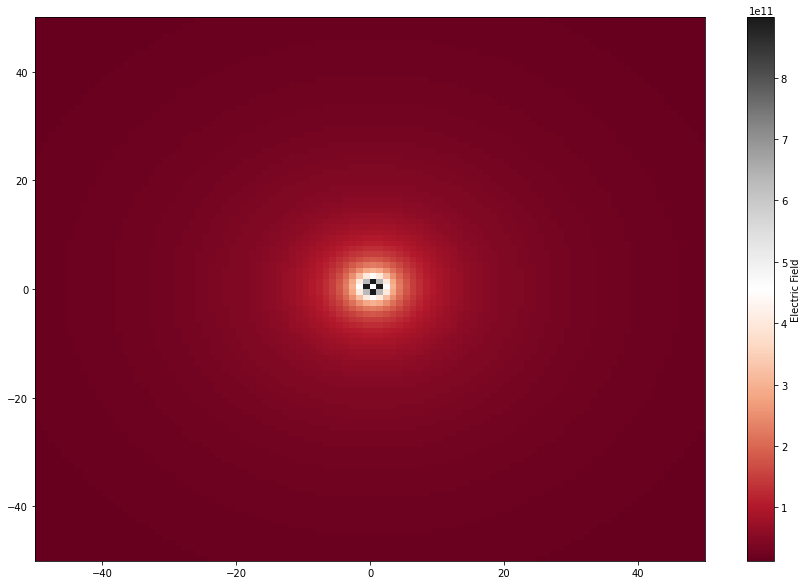

In [1]:
import numpy as np 
import scipy.constants as sp
import matplotlib.pyplot as plt 

  
x = np.arange(-50, 51, 1)
y = np.arange(-50, 51, 1)
X,Y = np.meshgrid(x, y)

for r in range (1,101,1):
  r = np.sqrt((X**2)+(Y**2))

epsilon_0_cm = sp.epsilon_0/100

# Function to determine electric potential  
def potential(r):
  q = 1
  return q/(4*np.pi*epsilon_0_cm*r)



plt.figure(figsize=(15,10))
plt.pcolormesh(X,Y,potential(r),cmap='RdGy')
plt.colorbar(label ='Electric Field')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


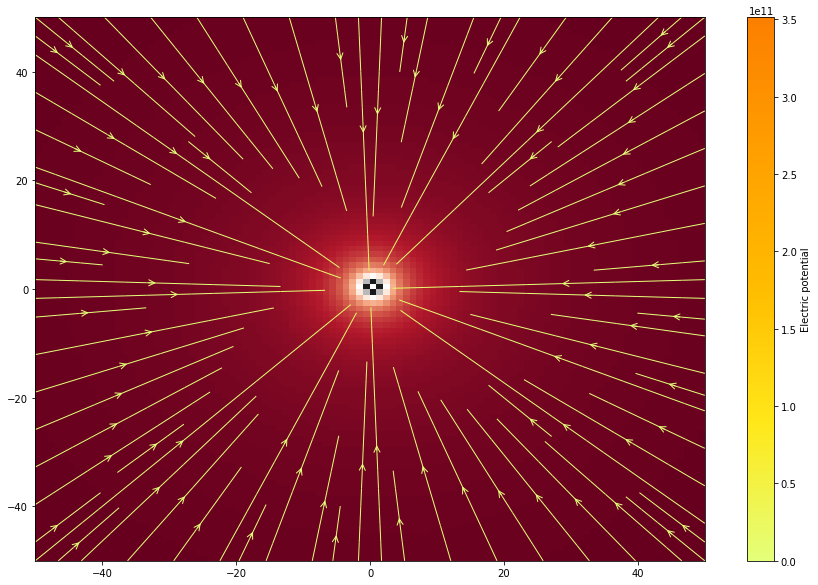

In [2]:
import numpy as np 
import scipy.constants as sp
import matplotlib.pyplot as plt 

  
x = np.arange(-50, 51, 1)
y = np.arange(-50, 51, 1)
X,Y = np.meshgrid(x, y)

for r in range (-50,51,1):
  r = np.sqrt((X**2)+(Y**2))

epsilon_0_cm = sp.epsilon_0/100


# Function to determine electric potential  
def field(r):
  q = 1
  potential = q/(4*np.pi*epsilon_0_cm*r)
  return potential 

E_Y,E_X = np.gradient(potential(r),y,x)

plt.figure(figsize=(15,10))
colors = np.sqrt(E_Y**2+E_X**2)
plt.pcolormesh(X,Y,potential(r),cmap='RdGy')
plt.streamplot(x,y,E_X,E_Y, color=colors, cmap=plt.cm.Wistia,linewidth=1,arrowstyle="->",density =1, arrowsize=1.5)
plt.colorbar(label ='Electric potential')
plt.show()

In [13]:
dx              = .01  #in meters
dy              = .01  #in meters
k = 9.0e9 #in N m^2/C^2

In [14]:

# Function to determine electric potential  
def elect_potential(q,q_loc,X,Y):
  R = np.sqrt((X-q_loc[0])**2+(Y-q_loc[1])**2) #calculate the distance of each grid point to the charge
  mindist = np.sqrt(dx**2 + dy**2) * 2
  R[R < mindist]  = mindist 
  potential = k * q / R
  return potential

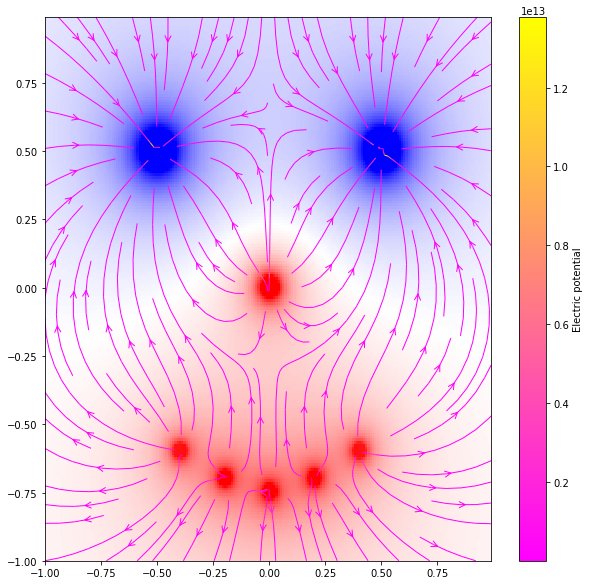

In [16]:
import numpy as np 
import scipy.constants as sp
import matplotlib.pyplot as plt 

charge_position = np.array([[0.0,0.0],[0.5,0.5],[-0.5,0.5],[0,-0.75],[.2,-.7],[.4,-.6],[-.2,-.7],[-.4,-.6]]) #in meters
charge_value    = np.array([1.0,-2.0,-2.0,0.5,0.5,0.5,0.5,0.5]) #in Coulombs
x = np.arange(-1, 1, dx)
y = np.arange(-1, 1, dy)
X,Y = np.meshgrid(x, y)

phi = np.zeros([len(x),len(y)])

for r in range (len(charge_value)):
  phi += elect_potential(charge_value[r],charge_position[r],X,Y)


epsilon_0_cm = sp.epsilon_0/100

E_Y,E_X = np.gradient(phi,y,x)
E_Y *= -1.0
E_X *= -1.0

plt.figure(figsize=(10,10))
colors = np.sqrt(E_Y**2+E_X**2)
plt.pcolormesh(X,Y,phi,cmap='bwr',vmin = -2e11,vmax=2e11) #Makes a heatmap for the data with Z being the dependent variable 
plt.streamplot(x,y,E_X,E_Y, color=colors, cmap=plt.cm.spring,linewidth=1,arrowstyle="->",density =1, arrowsize=1.5)
plt.colorbar(label ='Electric potential')
plt.show()